## Hello !!

This notebook is sort of a start on important concepts in Machine Learning like 

1)Feature Selection

2)Model selection

3)Input validation

....

Excuus vooraf half Nederlands/Engels document.


In [1]:
# Import nodige modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan diab variabele. 

In [2]:
diab = pd.read_csv("diabetes.csv")

### Opdracht 2:
Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [3]:
"""
Running the describe function of the dataframe returns a summary of this data, I can see there is an even count across the columns 
meaning we have no missing values . This also tells me there are some outliers in the data the Insulin column 
shows a max entry of 846, far seperated from the mean with a std of 115
"""

diab.describe()
diab.head()
diab.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?
Kan je een uitspraak doen over het aantal mannen?

Reken de waarden hieronder uit.


In [4]:

filter = diab["Insulin"]==0

diab_non_insulin = diab.where(filter)

diab_insulin = diab.where(~filter)

diab_insulin


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By making a filter for the insulin column where the entries are 0, we can filter out people that are non-diabetic. Looking at the count for that dataset we can see 374 entries, leaving the counts at;

Non Diabetic: 374
Diabetic: 394



### Een korte analyse.

Bekijk de onderstaande plots, valt er iets op? 

/tmp/ipykernel_5043/442756422.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


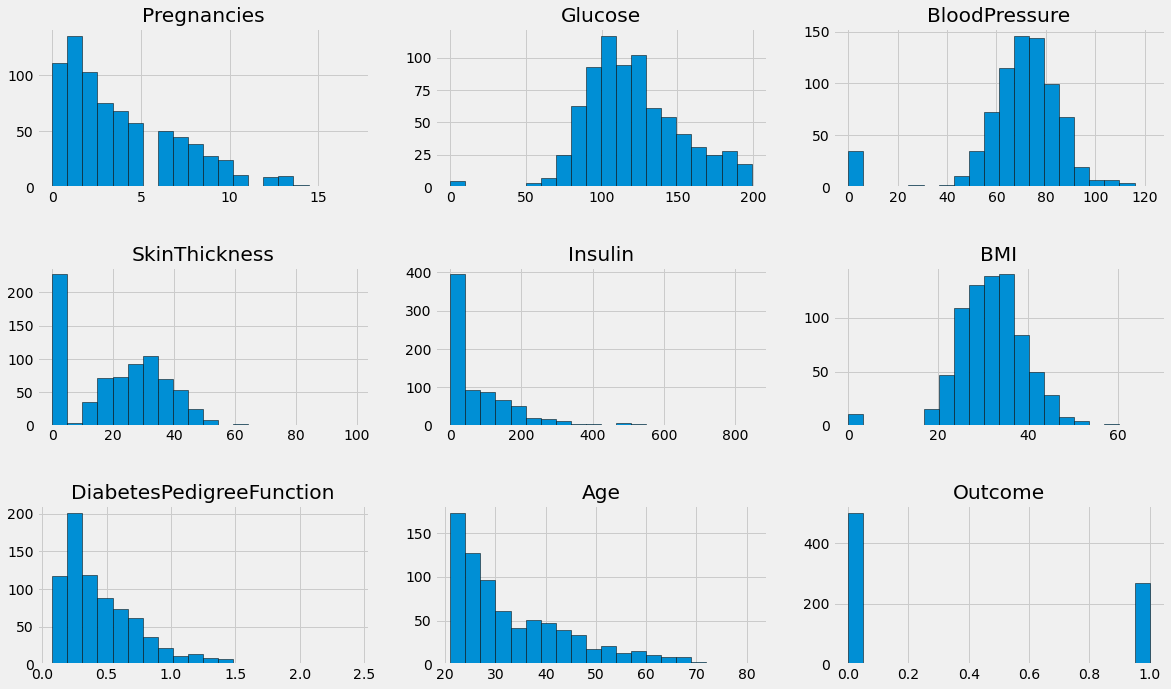

In [5]:
columns=diab.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Wat valt er op?




### Opgrave 4 Opmerkingen
Het valt op dat er twee soorten verdelingen zijn, standaard normaal en liniare regressie?

### Opgave 5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 

Bevatten sommige kolommen ongeldige waarden?

Repareer de tabel zo dat er geen nul waarden instaan? 

Welke waarde zou je kiezen als vervanging van de nul waarden?


TIP: Maak eerst een tabel met alleen de diabetes gevallen. 

#### Opgave 5 Opmerkingen
Sommige kollommen bevatten 0 waardes. 



/tmp/ipykernel_5043/4217931138.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length1/2),3,j+1)


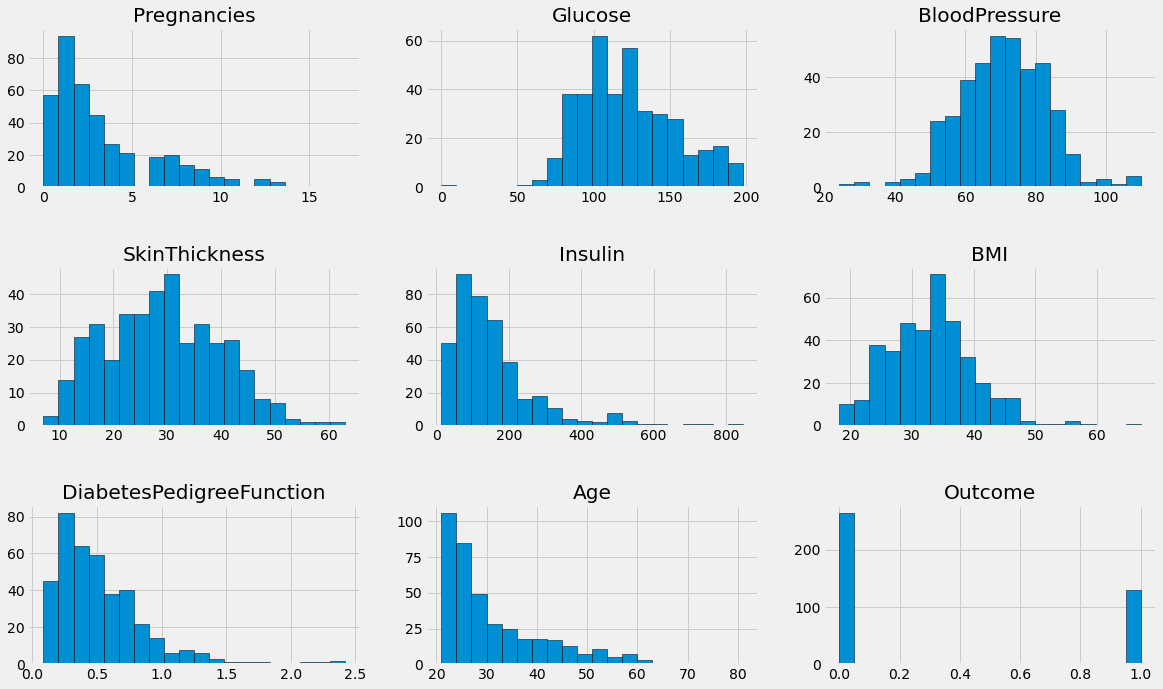

In [6]:
diab_insulin['BMI']=diab_insulin['BMI'].replace(0,diab_insulin['BMI'].mean())
diab_insulin['BloodPressure']=diab_insulin['BloodPressure'].replace(0,diab_insulin['BloodPressure'].mean())




columns1=diab_insulin.columns[:9]
plt.subplots(figsize=(18,15))
length1=len(columns1)
for i,j in itertools.zip_longest(columns,range(length1)):
    plt.subplot((length1/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_insulin[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hierondergenoemde classifier de mediawiki pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier keizen?
.
.
.
.
.
.
.
.



In [7]:
# Importeen aantal standaard systeem voor machine-learning

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 6:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschijving:

. Defineer outcome met de Outcome column out de dataset
. Defineer data met alle columns out de dataset behalve outcome
. Split de dataset in train en test met outcome als test
. verdeel de train en test dataset in X en Y as
. Laat vervolgens zien wat er in de dataset staat met head()
. 
.
.
.
.
.
.
.
.
.

In [8]:
# De code hieronder is absuluut noodzakelijk voor een ML training.

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [9]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [10]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

### SVM

In [11]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


### Logistic Regression

In [12]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


### Opdracht :
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.



In [33]:
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)

test_Y = np.array(test_Y).reshape(-1,1)
# Train Decision Tree Classifer
model = model.fit(train_X, train_Y)

#Predict the response for test dataset
y_pred = model.predict(test_X)

# Model Accuracy, how frequently is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(test_Y, y_pred))



Accuracy:  0.7604166666666666


### Alle systemen op een rijtje.


In [14]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.750000


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:
1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

### Correlation Matrix

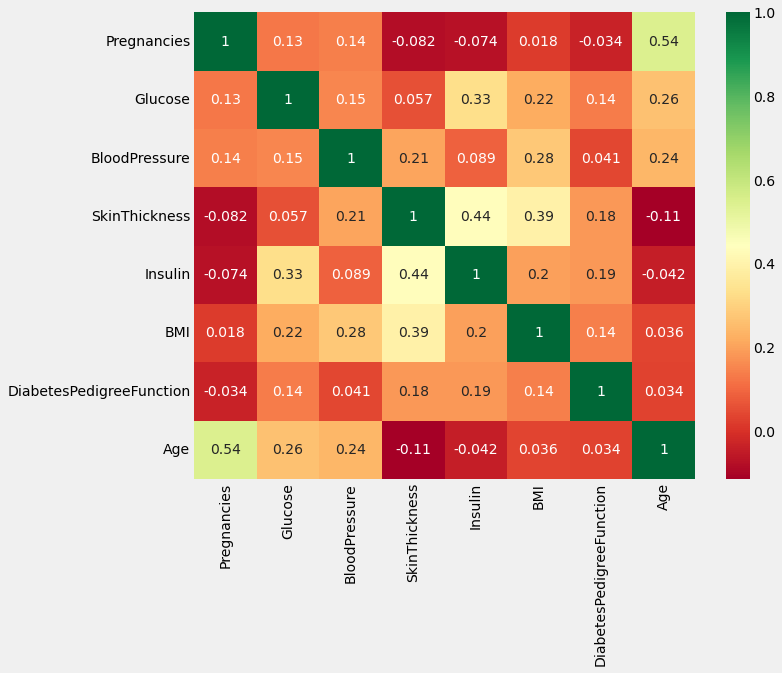

In [15]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Vraag: Wat zie je in de correlatie matrix zegt het iets over de features, en zo ja wat?

In [ ]:
### Antwoord:
Je kunt zien dat Insuline en skinthickness een sterke correlatie hebben netals age en pregnancies


In [16]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Wat is een  correlatie matrix?

Je kunt zien welke waardes een sterke samenhang hebben, een hoger getal betekent sterkere samenhang

### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes?

. Age
. Insulin
. BMI
.
.
.
.
..
.


### Opdracht x:

Selecteer uit de dataset nu alleen de belangrijkste features en train en test de voorgaande modelen. 
Zijn de resultaten op de naukeurigheid toegenomen of juist niet?

In [17]:
# Maak nu op basis van het nieuw getraind model een kleine app(in het notebook) 
# dat vraagt om de features en voorspelt of er sprake is van diabetes.

# Succes.





# Laatste opdracht: bewaar dit notebook op je persoonlijke gitlab project in een folder genaamd bootcamp/notebooks
    

## Reflectie
Het is steeds iets duidelijker hoe de datasets worden opgedeeld en verwerkt in de algoritme, ik zie steeds meer de krachten van machine learning en algorithme, en daarnaast ook het opschonen van dataset voor gebruik. 